# Naive Bayesian - Multinomial - Lab
### === Task ===

Learn about TFidVectorizer and replace CountVectorizer with TfidfVectorizer. Put Multinomial Naive Classification into a class that can transform the data, fit the model and do prediction. (In the class, allow users to choose whether to use CountVectorizer or TFIDVectorizer to transform the data.)

#### st122645 Pyae Sone

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import label_binarize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import average_precision_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [14]:
class MultinomialNB():
    def __init__(self,):
        pass
    
    def transform_data(self, train_data, test_data, method):
        if method == 'CountVectorizer':
            vectorizer = CountVectorizer()
            
            X_train = vectorizer.fit_transform(train_data)
            X_test = vectorizer.transform(test_data)
            X_test = X_test.toarray()
            y_train = train.target
            y_test = test.target
            return X_train, y_train, X_test, y_test

        elif method == 'TfidfVectorizer':
            vectorizer = TfidfVectorizer()
           
            X_train = vectorizer.fit_transform(train_data)
            X_test = vectorizer.transform(test_data)
            X_test = X_test.toarray()
            y_train = train.target
            y_test = test.target
            return X_train, y_train, X_test, y_test
        
        else : 
            raise ValueError('Method must be one of the followings: "CountVectorizer" or "TfidfVectorizer"')
            
    def likelihood(self, X_class, laplace=1):
        return ((X_class.sum(axis=0)) + laplace) / (np.sum(X_class.sum(axis=0) + laplace))
    
    def prior(self, X_class):
        return X_class.shape[0] / self.m
    
    def fit(self, X_train, y_train):
        self.m, self.n = X_train.shape
        self.classes = np.unique(y_train)  
        self.k = len(self.classes) 
        
        self.priors = np.zeros(self.k) 
        self.likelihoods = np.zeros((self.k,self.n)) 
    
        for idx, label in enumerate(self.classes):
            X_train_c = X_train[y_train==label]
            self.priors[idx] = self.prior(X_train_c)
            self.likelihoods[idx, :] = self.likelihood(X_train_c)
        #return self.priors, self.likelihoods
    
    def predict(self, X_test):
        yhat = np.log(self.priors) + X_test @ np.log(self.likelihoods.T)
        return np.argmax(yhat, axis=1)

In [15]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [16]:
categories = ['talk.politics.guns', 'sci.crypt',
              'soc.religion.christian', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

train_data = train.data
test_data = test.data

In [17]:
print(train.data[0]) #first 300 words
print("Target: ", train.target[0]) 

From: 18669@bach.udel.edu (Steven R Hoskins)
Subject: Some questions from a new Christian
Organization: University of Delaware
Lines: 40

Hi,

I am new to this newsgroup, and also fairly new to christianity. I was
raised as a Unitarian and have spent the better part of my life as an
agnostic, but recently I have developed the firm conviction that the
Christian message is correct and I have accepted Jesus into my life. I am
happy, but I realize I am very ignorant about much of the Bible and
quite possibly about what Christians should hold as true. This I am trying
to rectify (by reading the Bible of course), but it would be helpful
to also read a good interpretation/commentary on the Bible or other
relevant aspects of the Christian faith. One of my questions I would
like to ask is - Can anyone recommend a good reading list of theological
works intended for a lay person?

I have another question I would like to ask. I am not yet affiliated
with any one congregation. Aside from matters of

In [18]:
model = MultinomialNB()
X_train, y_train, X_test, y_test = model.transform_data(train_data, test_data, method='CountVectorizer')                                        
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [19]:
n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Accuracy:  0.9631544925662573
=========Average precision score=======
Class 0 score:  0.914661375722921
Class 1 score:  0.9088350455924712
Class 2 score:  0.9726670056689477
Class 3 score:  0.9538343270269002
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.95      0.95      0.95       389
           1       0.94      0.96      0.95       396
           2       0.99      0.98      0.98       398
           3       0.98      0.96      0.97       364

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



Text(32.99999999999999, 0.5, 'predicted')

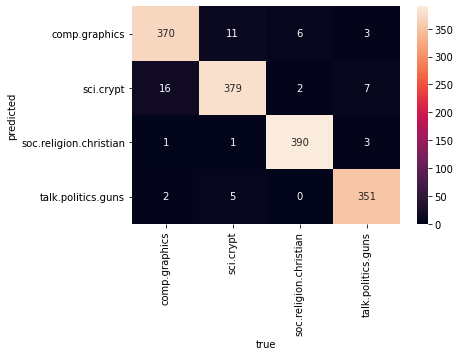

In [20]:
mat = confusion_matrix(y_test, yhat)

sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

In [21]:
model = MultinomialNB()
X_train, y_train, X_test, y_test = model.transform_data(train_data, test_data, method='TfidfVectorizer')                                        
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [22]:
n_classes = len(np.unique(y_test))

print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2, 3])

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)
    
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Accuracy:  0.9334195216548158
=========Average precision score=======
Class 0 score:  0.8526451682482732
Class 1 score:  0.8499748907592044
Class 2 score:  0.9268515288033005
Class 3 score:  0.9344052545410011
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.98      0.82      0.89       389
           1       0.86      0.98      0.92       396
           2       0.93      0.99      0.96       398
           3       0.98      0.94      0.96       364

    accuracy                           0.93      1547
   macro avg       0.94      0.93      0.93      1547
weighted avg       0.94      0.93      0.93      1547



Text(32.99999999999999, 0.5, 'predicted')

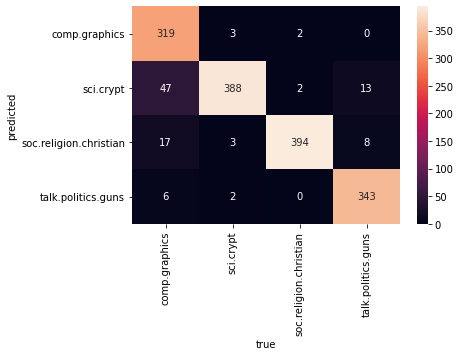

In [23]:
mat = confusion_matrix(y_test, yhat)

sns.heatmap(mat.T, annot=True, fmt="d",
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true')
plt.ylabel('predicted')

In [24]:
model = MultinomialNB()
X_train, y_train, X_test, y_test = model.transform_data(train_data, test_data, method='Regression')                                        
model.fit(X_train, y_train)
yhat = model.predict(X_test)

ValueError: Method must be one of the followings: "CountVectorizer" or "TfidfVectorizer"